Good health is essential to all aspects of our lives.  One spends a lot of money to be healthy by participating in physical activities or having frequent health check-ups to avoid being unfit and get rid of health disorders. When we become ill we tend to spend a lot of money, resulting in a lot of medical expenses.objective of this model is to accurately predict insurance costs based on people’s data, including age, Body Mass Index, smoking or not, etc. Additionally, we will also determine what the important variable influencing insurance costs is. It can also help the insurance agency in making profits.lets explore the data further.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_excel('Health_insurance_cost.xlsx')

In [3]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [7]:
df.isnull().mean()

age                       0.020927
gender                    0.000000
BMI                       0.017190
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.001495
dtype: float64

In [8]:
numerical=[i for i in df.columns if df[i].nunique()>20]

In [9]:
catogrical=[i for i in df.columns if i not in numerical]

In [10]:
catogrical

['gender', 'Children', 'smoking_status', 'location']

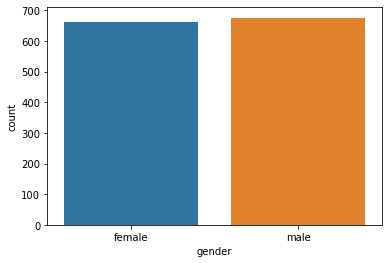

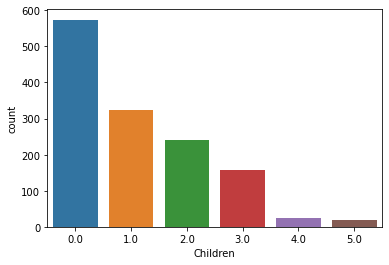

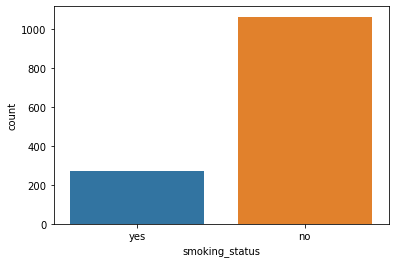

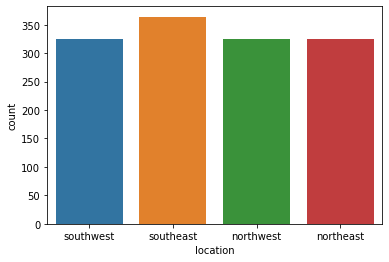

In [11]:
for i in catogrical:
    sns.countplot(data=df,x=i)
    plt.show()

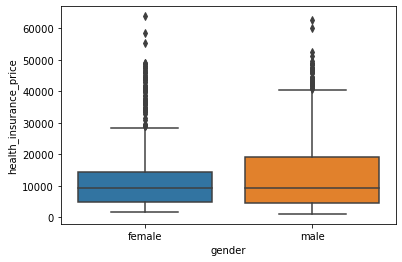

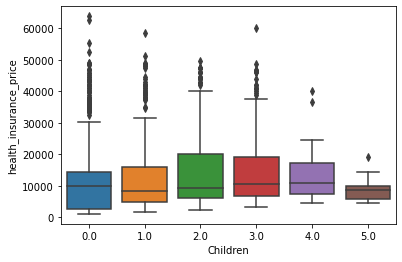

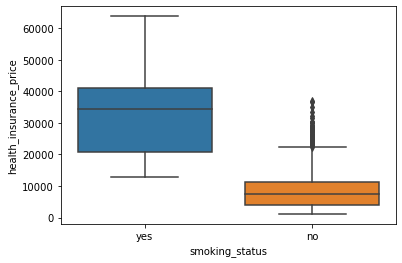

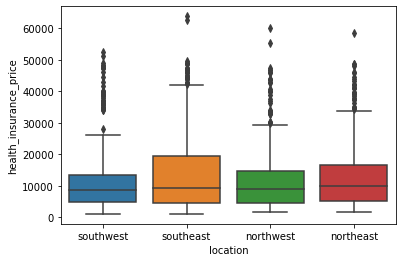

In [12]:
for i in catogrical:
    sns.boxplot(data=df,x=i,y='health_insurance_price')
    plt.show()

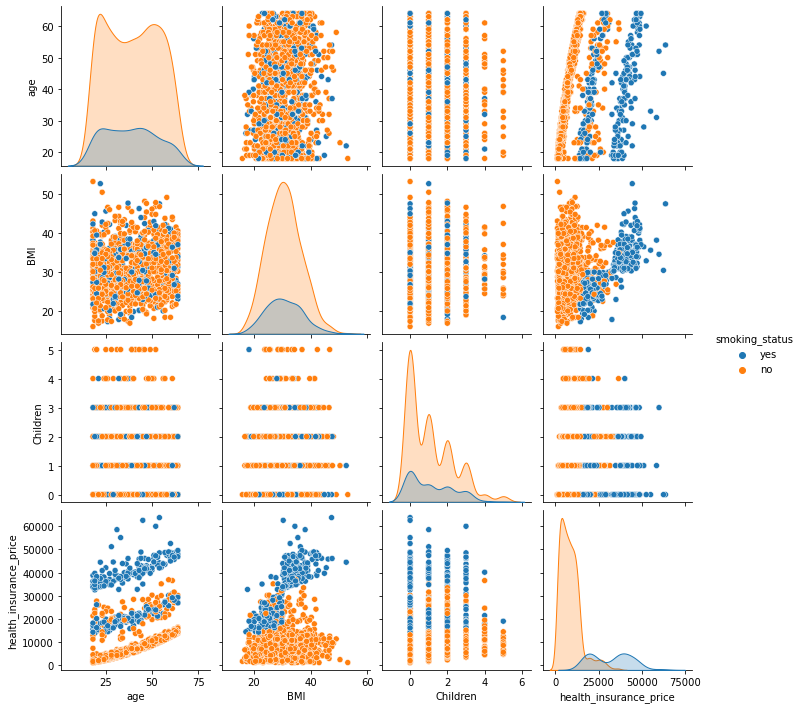

In [13]:
#plot the relation between the categorical variables and other remaining attributes.
sns.pairplot(df,hue='smoking_status')


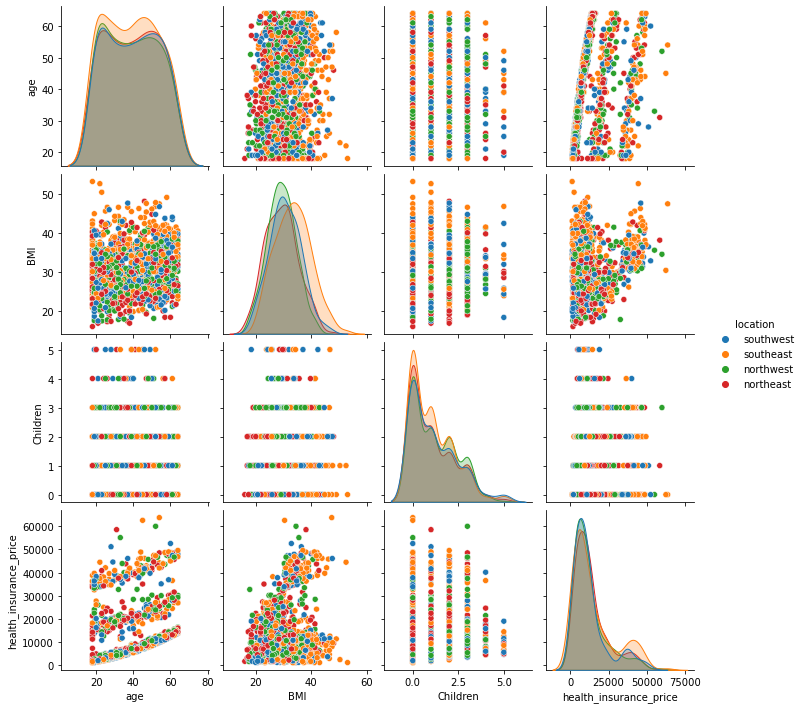

In [14]:
sns.pairplot(df,hue='location')

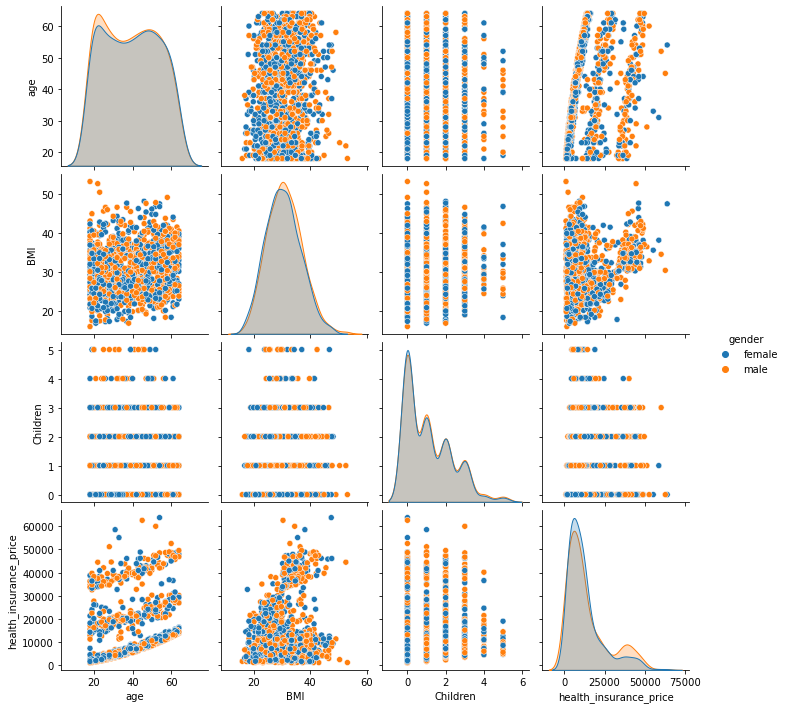

In [15]:
sns.pairplot(df,hue='gender')

<AxesSubplot:>

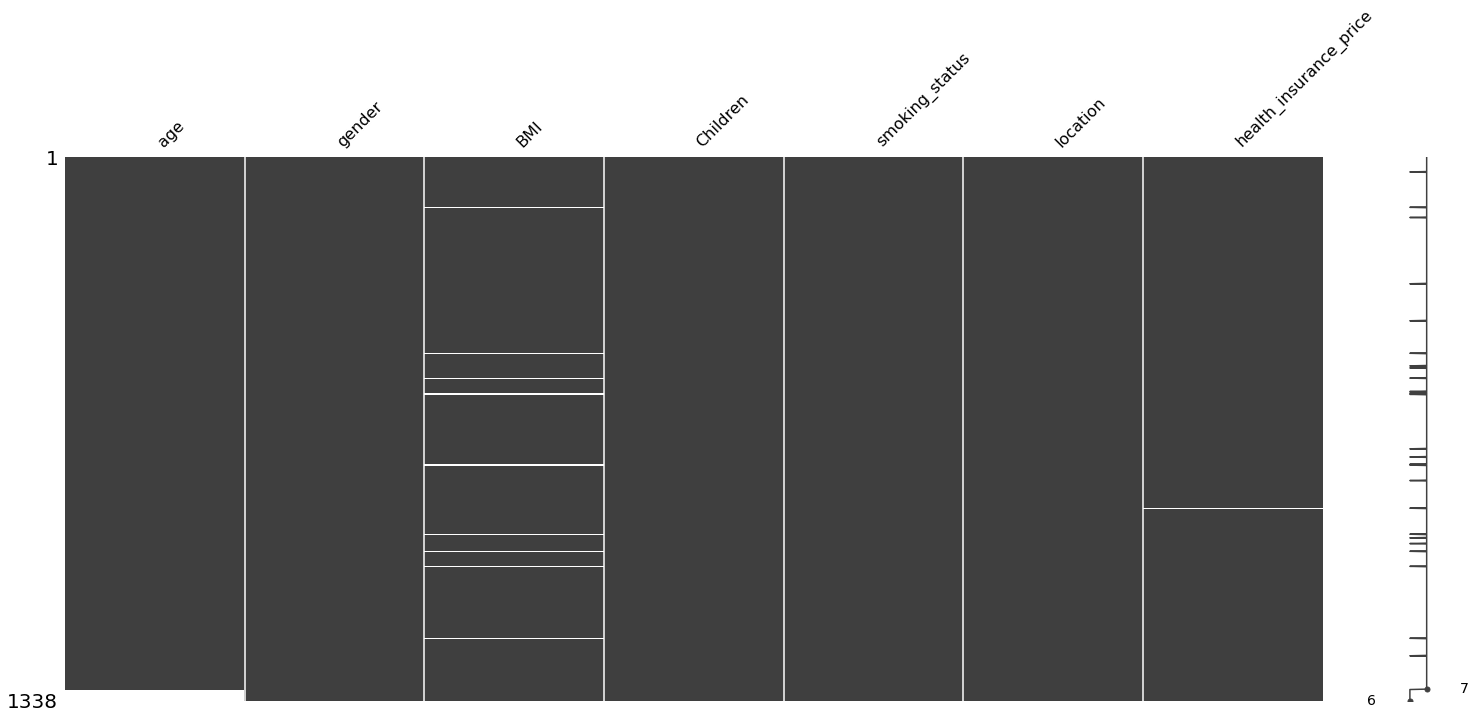

In [16]:
sorted = df.sort_values('age')
msno.matrix(sorted)

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error',dtype='int') 

In [18]:
encoder.fit(df[['gender','smoking_status']])

OneHotEncoder(drop='first', dtype='int', sparse=False)

In [19]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object)]

In [20]:
tmp = encoder.transform(df[['gender','smoking_status']])

tmp = pd.DataFrame(tmp)

In [21]:

tmp.columns = encoder.get_feature_names_out()

In [22]:
df1=df.drop(df[['gender','smoking_status']],axis=1)

In [23]:
df2=pd.concat([df1,tmp],axis=1)

In [24]:
df2

,age,BMI,Children,location,health_insurance_price,gender_male,smoking_status_yes
0,19.0,NaN,0.0,southwest,16884.92400,0,1
1,18.0,33.770,1.0,southeast,1725.55230,1,0
2,28.0,33.000,3.0,southeast,4449.46200,1,0
3,33.0,22.705,0.0,northwest,21984.47061,1,0
4,32.0,28.880,0.0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,northwest,10600.54830,1,0
1334,18.0,31.920,0.0,northeast,2205.98080,0,0
1335,18.0,36.850,0.0,southeast,1629.83350,0,0
1336,21.0,25.800,0.0,southwest,2007.94500,0,0


In [25]:
dicx={}
for i in df2.location:
    if i=='southeast':
        dicx[i]='south'
    
    if i=='northeast':
        dicx[i]='north'
     
    if i=='southwest':
        dicx[i]='south'
    
    if i=='northwest':
        dicx[i]='north'    

In [26]:
temp=df2['location'].map(dicx)

In [27]:
x=pd.get_dummies(data=temp,drop_first=True)

In [28]:
df2=pd.concat([df2,x],axis=1)

In [29]:
df2=df2.drop(['location'],axis=1)

In [30]:
df2.isnull().sum()

age                       28
BMI                       23
Children                   0
health_insurance_price     2
gender_male                0
smoking_status_yes         0
south                      0
dtype: int64

In [31]:
df3 = df2[df2['health_insurance_price'].notna()]

In [32]:
from fancyimpute import KNN
knn_imputer = KNN()
df3_knn= df3.copy(deep=True)
df3_knn.iloc[:, :] = knn_imputer.fit_transform(df3_knn)

Imputing row 1/1336 with 1 missing, elapsed time: 0.182
Imputing row 101/1336 with 0 missing, elapsed time: 0.182
Imputing row 201/1336 with 0 missing, elapsed time: 0.182
Imputing row 301/1336 with 0 missing, elapsed time: 0.183
Imputing row 401/1336 with 0 missing, elapsed time: 0.184
Imputing row 501/1336 with 0 missing, elapsed time: 0.184
Imputing row 601/1336 with 0 missing, elapsed time: 0.184
Imputing row 701/1336 with 0 missing, elapsed time: 0.185
Imputing row 801/1336 with 0 missing, elapsed time: 0.185
Imputing row 901/1336 with 0 missing, elapsed time: 0.186
Imputing row 1001/1336 with 0 missing, elapsed time: 0.186
Imputing row 1101/1336 with 0 missing, elapsed time: 0.186
Imputing row 1201/1336 with 0 missing, elapsed time: 0.187
Imputing row 1301/1336 with 0 missing, elapsed time: 0.187


In [33]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df3_MICE = df3.copy(deep=True)
df3_MICE.iloc[:, :] = MICE_imputer.fit_transform(df3_MICE)

In [34]:
df3_MICE

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,south
0,19.0,28.20237,0.0,16884.92400,0.0,1.0,1.0
1,18.0,33.77000,1.0,1725.55230,1.0,0.0,1.0
2,28.0,33.00000,3.0,4449.46200,1.0,0.0,1.0
3,33.0,22.70500,0.0,21984.47061,1.0,0.0,0.0
4,32.0,28.88000,0.0,3866.85520,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1333,50.0,30.97000,3.0,10600.54830,1.0,0.0,0.0
1334,18.0,31.92000,0.0,2205.98080,0.0,0.0,0.0
1335,18.0,36.85000,0.0,1629.83350,0.0,0.0,1.0
1336,21.0,25.80000,0.0,2007.94500,0.0,0.0,1.0


In [35]:
nullity = df3['BMI'].isnull() 
imputation ={'KNN Imputation': df3_knn,
              'MICE Imputation': df3_MICE}

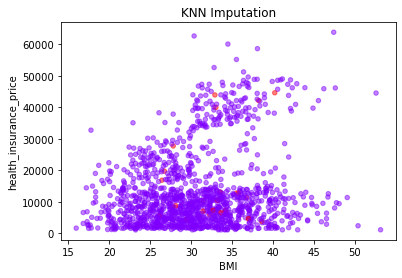

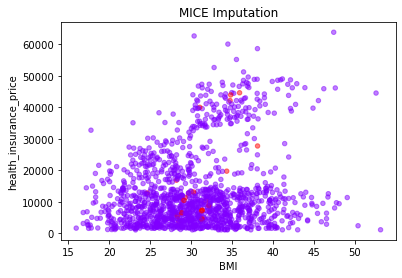

In [36]:
for df_key in imputation:
    imputation[df_key].plot(x='BMI', y='health_insurance_price', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow',
                             colorbar=False, title=df_key)
    plt.show()

In [37]:
nullity = df3['age'].isnull() 
imputation ={'KNN Imputation': df3_knn,
              'MICE Imputation': df3_MICE}

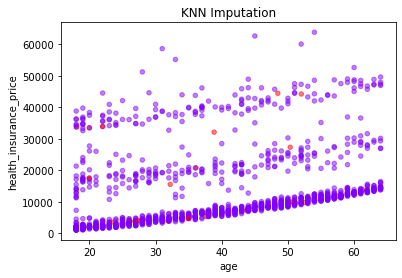

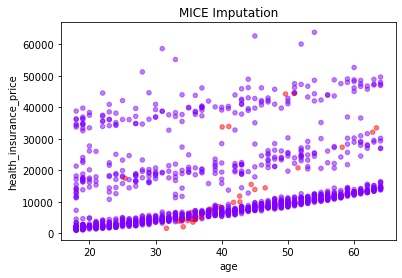

In [38]:
for df_key in imputation:
    imputation[df_key].plot(x='age', y='health_insurance_price', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow',
                             colorbar=False, title=df_key)
    plt.show()

In [39]:
df4=df3_knn.copy()

In [40]:
df4.isna().sum()

age                       0
BMI                       0
Children                  0
health_insurance_price    0
gender_male               0
smoking_status_yes        0
south                     0
dtype: int64

In [41]:
continious=[i for i in df4.columns if df4[i].nunique()>20]

In [42]:
continious

['age', 'BMI', 'health_insurance_price']

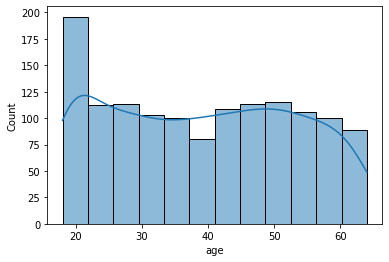

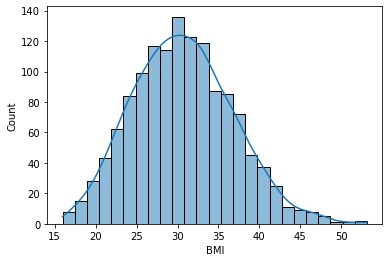

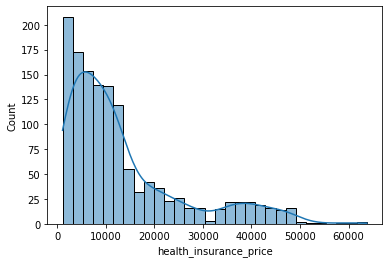

In [43]:
for i in continious:
    sns.histplot(data=df4,x=df4[i],kde=True)
    plt.show()

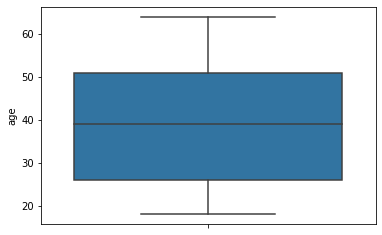

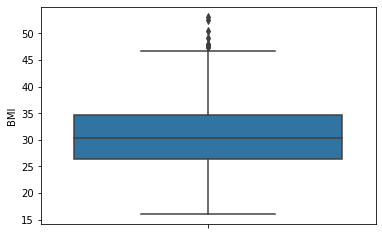

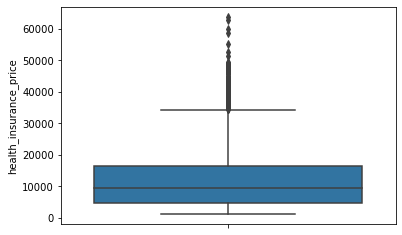

In [44]:
for i in continious:
    sns.boxplot(data=df4,y=df4[i])
    plt.show()

In [45]:
df_drop=df4.copy()

In [46]:
def find_skewed_boundaries(df, variable, distance):


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [47]:
for i in continious:
    (upper,lower)=find_skewed_boundaries(df_drop,i,1.5)
    df_drop[i] = np.where(df_drop[i] >upper,np.nan,df_drop[i])
    
   



In [48]:
df_drop.isnull().sum()

age                         0
BMI                         9
Children                    0
health_insurance_price    141
gender_male                 0
smoking_status_yes          0
south                       0
dtype: int64

<AxesSubplot:>

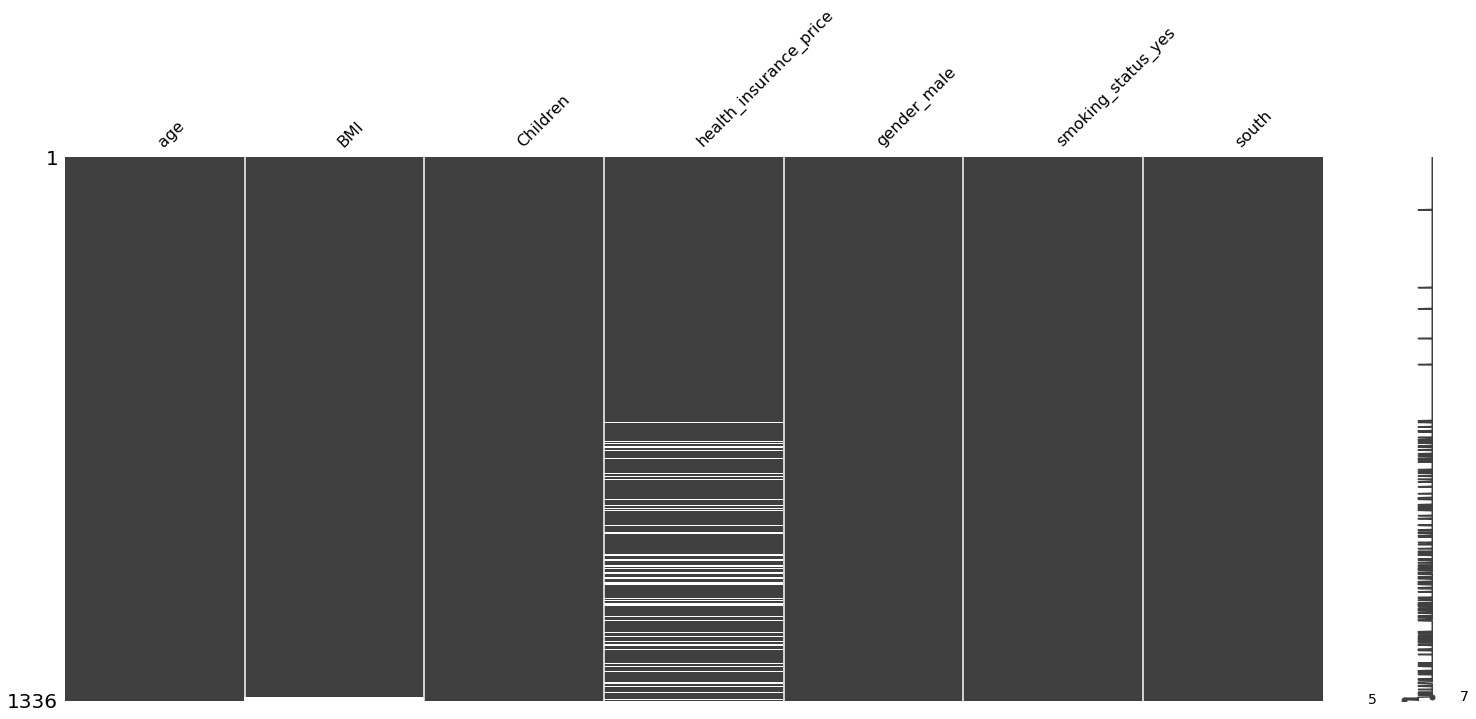

In [49]:
sorted = df_drop.sort_values('BMI')
msno.matrix(sorted)

In [50]:
df4=df_drop.dropna()

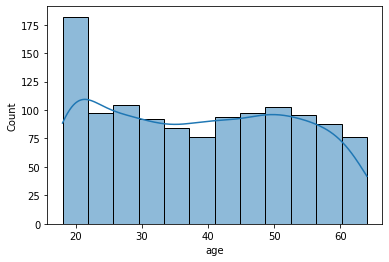

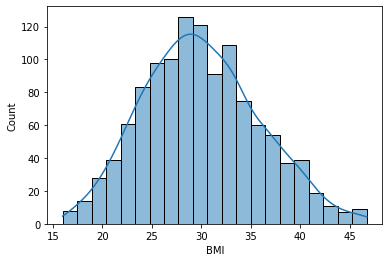

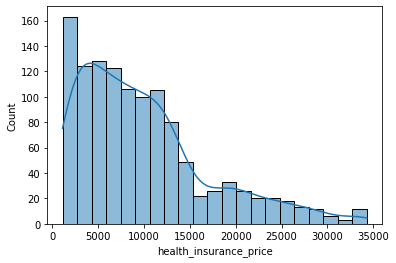

In [51]:
for i in continious:
    sns.histplot(data=df4,x=df4[i],kde=True)
    plt.show()

lets perform transformation on age and health insurance

In [52]:
trans_data=df4.copy()

In [53]:
trans_data['health_insurance_price'] = np.log10(trans_data['health_insurance_price'])

<AxesSubplot:xlabel='health_insurance_price', ylabel='Count'>

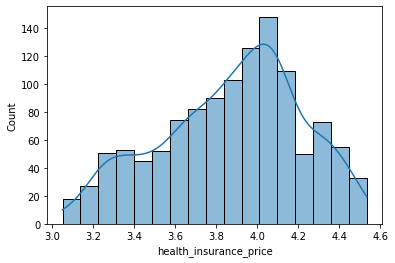

In [54]:
sns.histplot(data=trans_data,x=trans_data['health_insurance_price'],kde=True)

In [55]:
trans_data['age'] = np.sqrt(trans_data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

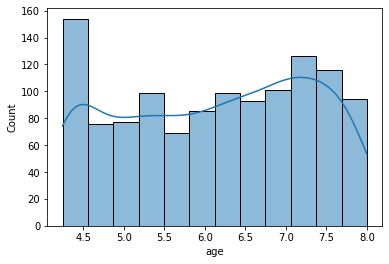

In [56]:
sns.histplot(data=trans_data,x=trans_data['age'],kde=True)

In [57]:
df4=trans_data.copy()

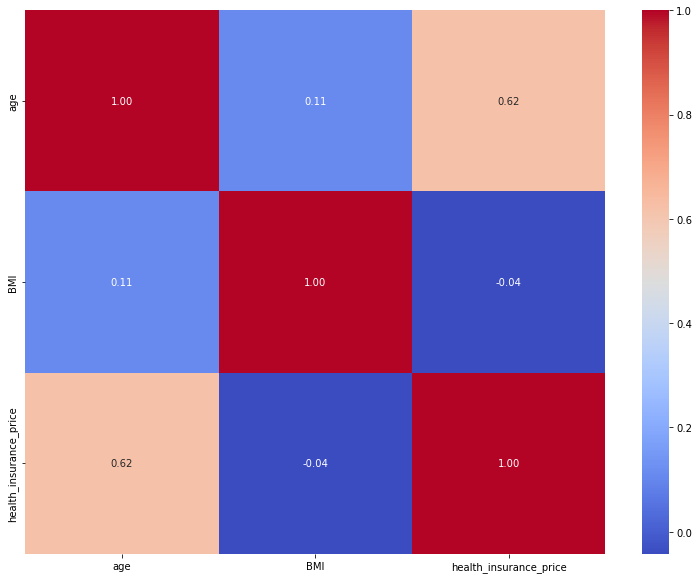

In [58]:
plt.figure(figsize=(13,10))

sns.heatmap(df4[continious].corr(method = "spearman"),annot=True,fmt = ".2f", cmap="coolwarm");

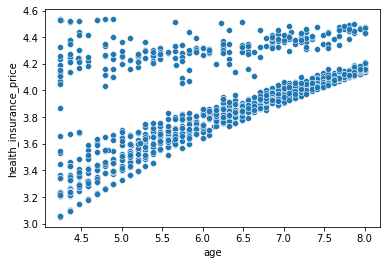

<AxesSubplot:xlabel='BMI', ylabel='health_insurance_price'>

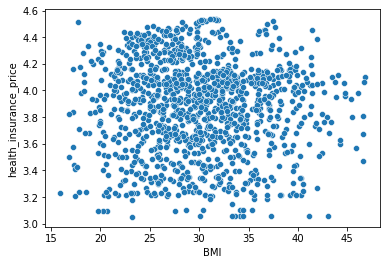

In [59]:
sns.scatterplot(data=df4,x='age',y='health_insurance_price')
plt.show()
sns.scatterplot(data=df4,x='BMI',y='health_insurance_price')

we see moderate linear relationship between age and health insurance price and no linear relation between bmi insurance

There is no multicolinearlity between continious variable.

childeren is discrete data.

<AxesSubplot:xlabel='Children', ylabel='count'>

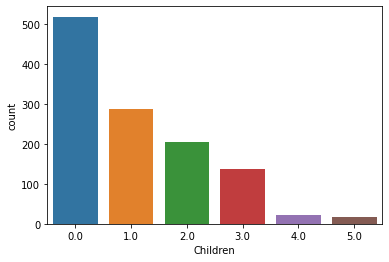

In [60]:
sns.countplot(data=df4,x=df4['Children'])

lets split as no childeren 1 or 2 children or more than 2 children

In [61]:
dicx={}
for i in df4.Children:
    if i==0:
        dicx[i]='NO child'
    else :
        dicx[i]='child'

In [62]:
temp=df4['Children'].map(dicx)

In [63]:
x=pd.get_dummies(data=temp,drop_first=True)

In [64]:
df5=pd.concat([df4,x],axis=1)

In [65]:
df5.drop(columns='Children',axis=1,inplace=True)

In [66]:
df5

,age,BMI,health_insurance_price,gender_male,smoking_status_yes,south,child
0,4.358899,26.426913,4.227499,0.0,1.0,1.0,0
1,4.242641,33.770000,3.236928,1.0,0.0,1.0,1
2,5.291503,33.000000,3.648308,1.0,0.0,1.0,1
3,5.744563,22.705000,4.342116,1.0,0.0,0.0,0
4,5.656854,28.880000,3.587358,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
1333,7.071068,30.970000,4.025328,1.0,0.0,0.0,1
1334,4.242641,31.920000,3.343602,0.0,0.0,0.0,0
1335,4.242641,36.850000,3.212143,0.0,0.0,1.0,0
1336,4.582576,25.800000,3.302752,0.0,0.0,1.0,0


In [67]:
cols = df5.columns.tolist()

In [68]:
cols=cols[0:2]+cols[3:]+cols[2:3]

In [69]:
df6=df5[cols]

In [70]:
df6

,age,BMI,gender_male,smoking_status_yes,south,child,health_insurance_price
0,4.358899,26.426913,0.0,1.0,1.0,0,4.227499
1,4.242641,33.770000,1.0,0.0,1.0,1,3.236928
2,5.291503,33.000000,1.0,0.0,1.0,1,3.648308
3,5.744563,22.705000,1.0,0.0,0.0,0,4.342116
4,5.656854,28.880000,1.0,0.0,0.0,0,3.587358
...,...,...,...,...,...,...,...
1333,7.071068,30.970000,1.0,0.0,0.0,1,4.025328
1334,4.242641,31.920000,0.0,0.0,0.0,0,3.343602
1335,4.242641,36.850000,0.0,0.0,1.0,0,3.212143
1336,4.582576,25.800000,0.0,0.0,1.0,0,3.302752


In [71]:
cat=[i for i in df6.columns if i not in continious ]

In [72]:
from sklearn.feature_selection import chi2
resultant = pd.DataFrame(data=0,columns= cat,index=cat)
for i in cat:
    for j in cat:
        if i!=j:
            chi2_val, p_val = chi2(np.array(df6[i]).reshape(-1, 1), np.array(df6[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val

In [73]:
resultant

,gender_male,smoking_status_yes,south,child
gender_male,0.000000,0.680486,0.815809,0.822234
smoking_status_yes,0.587991,0.000000,0.169064,0.704381
south,0.817300,0.299863,0.000000,0.800756
child,0.835847,0.790250,0.814452,0.000000


In [74]:
resultant[resultant<.05]

,gender_male,smoking_status_yes,south,child
gender_male,0.0,NaN,NaN,NaN
smoking_status_yes,NaN,0.0,NaN,NaN
south,NaN,NaN,0.0,NaN
child,NaN,NaN,NaN,0.0


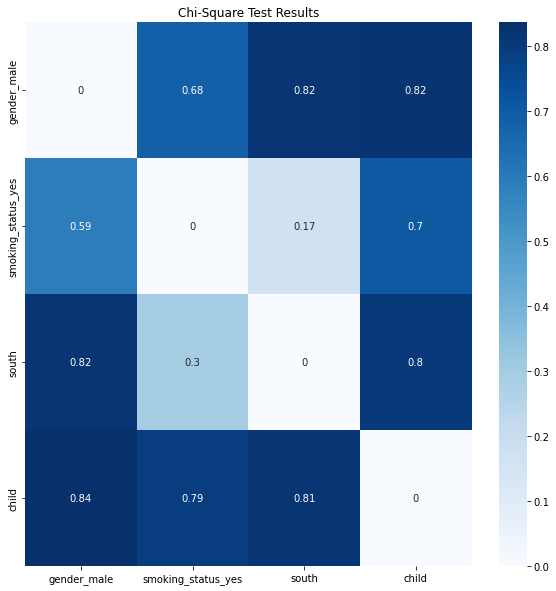

In [75]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

we see no multicolinearlity 

In [76]:
df6

,age,BMI,gender_male,smoking_status_yes,south,child,health_insurance_price
0,4.358899,26.426913,0.0,1.0,1.0,0,4.227499
1,4.242641,33.770000,1.0,0.0,1.0,1,3.236928
2,5.291503,33.000000,1.0,0.0,1.0,1,3.648308
3,5.744563,22.705000,1.0,0.0,0.0,0,4.342116
4,5.656854,28.880000,1.0,0.0,0.0,0,3.587358
...,...,...,...,...,...,...,...
1333,7.071068,30.970000,1.0,0.0,0.0,1,4.025328
1334,4.242641,31.920000,0.0,0.0,0.0,0,3.343602
1335,4.242641,36.850000,0.0,0.0,1.0,0,3.212143
1336,4.582576,25.800000,0.0,0.0,1.0,0,3.302752


In [77]:
from scipy.stats import ttest_ind
male = df6[df6['gender_male'] == 1]
female = df6[df6['gender_male'] == 0]
stats, p_value = ttest_ind(male['health_insurance_price'] ,female['health_insurance_price'],axis =0)
print("gender vs insurance Pvalue", p_value,p_value<.05)


gender vs insurance Pvalue 0.057354043918082534 False


In [78]:
ts, p = ttest_ind(df6[df6.smoking_status_yes==0].health_insurance_price,
                      df6[df6.smoking_status_yes==1].health_insurance_price,
                     )
print("p valuer for smoking and insurance is",p,p<.05)

p valuer for smoking and insurance is 1.3499164075467021e-66 True


In [79]:
ts, p = ttest_ind(df6[df6.child==0].health_insurance_price,
                      df6[df6.child==1].health_insurance_price,
                     )
print("p valuer for smoking and insurance is",p,p<.05)

p valuer for smoking and insurance is 1.9026943575700463e-09 True


In [80]:
       ts, p = ttest_ind(df6[df6.south==0].health_insurance_price,
                      df6[df6.south==1].health_insurance_price,
                     )
print("p valuer for smoking and insurance is",p,p<.05)

p valuer for smoking and insurance is 0.0008223320770424213 True


we can see every catogrical feature is corelated with target variable except gender.

lets check for colinearlity with continious features

In [81]:

male = df6[df6['gender_male'] == 1]
female = df6[df6['gender_male'] == 0]
stats, p_value = ttest_ind(male['BMI'] ,female['BMI'],axis =0)
print("Tstatistic , Pvalue", stats, p_value)

Tstatistic , Pvalue 0.5438927601420305 0.5866174103271782


In [82]:

male = df6[df6['gender_male'] == 1]
female = df6[df6['gender_male'] == 0]
stats, p_value = ttest_ind(male['age'] ,female['age'],axis =0)
print("Pvalue for gender age is", stats, p_value)

Pvalue for gender age is -0.7362420267871126 0.4617288895318479


In [83]:
               
ts, p = ttest_ind(df6[df6.south==0].BMI,
                      df6[df6.south==1].BMI)
print("p valuer for smoking and insurance is",p,p<.05)

p valuer for smoking and insurance is 1.7107912700668495e-12 True


In [84]:
               
ts, p = ttest_ind(df6[df6.south==0].age,
                      df6[df6.south==1].age)
print("p valuer for smoking and insurance is",p,p<.05)

p valuer for smoking and insurance is 0.8967512538853206 False


lets remove BMI and gender as they are no corelation with target variable.


In [85]:
df7=df6.drop(columns=['gender_male','BMI'])

In [86]:
df7

,age,smoking_status_yes,south,child,health_insurance_price
0,4.358899,1.0,1.0,0,4.227499
1,4.242641,0.0,1.0,1,3.236928
2,5.291503,0.0,1.0,1,3.648308
3,5.744563,0.0,0.0,0,4.342116
4,5.656854,0.0,0.0,0,3.587358
...,...,...,...,...,...
1333,7.071068,0.0,0.0,1,4.025328
1334,4.242641,0.0,0.0,0,3.343602
1335,4.242641,0.0,1.0,0,3.212143
1336,4.582576,0.0,1.0,0,3.302752


In [87]:
X=df7.drop('health_insurance_price',axis=1)

In [88]:
y=df7['health_insurance_price']

In [89]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [90]:
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)


Model

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [92]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [ 0.70850132  0.56066794 -0.04362962  0.08703899]


In [93]:
y_pred = lm.predict(X_train)

In [94]:
r2 = r2_score(y_true=y_train,y_pred=y_pred)
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.6523259340348696


In [95]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.85722573273506e-17


Text(0, 0.5, 'Residuals')

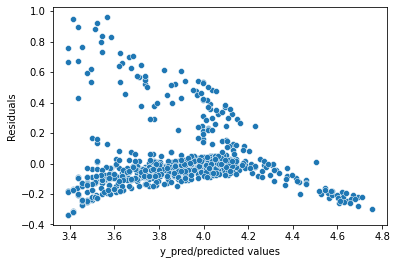

In [96]:
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')




Homoscedasticity faild .

C:\Users\SREENIVASAN\AppData\Local\Temp\ipykernel_11996\1714093312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<AxesSubplot:xlabel='health_insurance_price', ylabel='Density'>

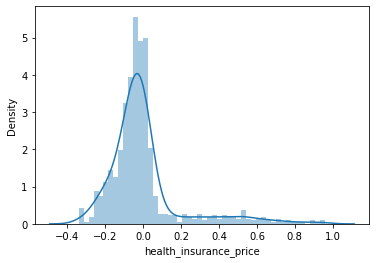

In [97]:
sns.distplot((y_train-y_pred),bins=50)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [99]:

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'randomforest': {
            'model': RandomForestRegressor(),
            'params': {
            "n_estimators"    : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False], }},
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'SVR':{
            'model':SVR(),
            'params':{
                'kernel': ('linear', 'rbf','poly'), 
                'C':[1.5, 10],
                'gamma': [1e-7, 1e-4],
                'epsilon':[0.1,0.2,0.5,0.3]
            }
        },
        'XGboost':{
            'model':xgb.XGBRegressor(),
            'params':{
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'n_estimators': [500]}
        }
    
    
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)


C:\Users\SREENIVASAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\SREENIVASAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\SREENIVASAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\SREENIVASAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\SREENIVASAN\anaconda3\lib\site-pack

[14:21:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

,model,best_score,best_params
0,randomforest,0.676876,"{'bootstrap': True, 'max_features': 'auto', 'm..."
1,decision_tree,0.605074,"{'criterion': 'mse', 'splitter': 'best'}"
2,SVR,0.675097,"{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'ker..."
3,XGboost,0.666662,"{'learning_rate': 0.03, 'max_depth': 5, 'n_est..."
